<h1 style="text-align:center;color:green;font-size:50px;font-family:ALGERIAN;border:solid">Projet de Data Science & Machine Learning </h1>

<h1 style="text-align:center;color:blue;font-size:50px;font-family:times">Ecole Nationale de la Statistique et de l'Analyse Economique Pierre NDIAYE (ENSAE) </h1><br>

<img scr="C:\Users\LENOVO\Desktop\ISE2\Machine_Learning_Project\ppimage.jpg"/>

<div style="display:flex;text-align:justify">
    
<ul style="text-align:justify;font-family:times;font-size:15px;list-style-type:circle; width:60%"> 
<span style="font-weight:bold">Réalisé par: </span> 
    <ul style="text-align:justify;font-family:times;font-size:18px;list-style-type:circle"> 
        <li>ALAJI BOUHARI Hamissou</li>                                      
        <li>ATSAMA Lianne Cédrique</li>
        <li>FALL Moussa</li>
    </ul>
    <span style="font-style: italic;color:blue;font-size:13px">Eléves Ingénieurs Statisticiens Economistes</span>
</ul>
 
<ul style="text-align:justify;font-family:times;font-size:18px;list-style-type:none;width:39%"> 
 <li style="font-weight:bold">Sous la supervision de:</li> 
<li>Mme Mously DIAW</li>                                     
   
</ul>
    
</div>

In [ ]:
!pip install chart_studio
!pip install lazypredict
!pip install numpy pandas scikit-learn matplotlib seaborn
!pip install -U scikit-learn

In [1]:
import pandas as pd
import numpy as np
import datetime
from math import sqrt
from numpy import loadtxt
from itertools import product
from tqdm import tqdm
import lazypredict
import matplotlib.pyplot as plt
import missingno as msno
import optuna
import pandas_profiling as pp
import plotly.express as px
import scipy as sp
import seaborn as sns
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn import set_config
from sklearn.compose import ColumnTransformer, make_column_selector
#from sklearn.datasets import fetch_california_housing, fetch_openml, load_boston, load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from optuna import Trial
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet,SGDRegressor
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from yellowbrick.target import FeatureCorrelation
from yellowbrick.model_selection import LearningCurve
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             #mean_absolute_percentage_error,
                             max_error,
                            )
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

set_config(display="diagram", print_changed_only=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


from pandas_profiling import ProfileReport
import statistics

from sklearn import set_config
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import (r2_score,
                             mean_squared_error,
                             mean_absolute_percentage_error,
                             median_absolute_error,
                             max_error, make_scorer
                            )
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,cross_val_score,validation_curve,learning_curve
from sklearn.pipeline import make_pipeline, Pipeline 
from sklearn.feature_selection import SelectKBest, f_classif,chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
set_config(display="diagram", print_changed_only=False)

import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()
os.chdir(r'C:\Users\admin\Desktop\ISE_22\ML_Project\Donnees')
train=pd.read_csv('sales_train.csv')
test = pd.read_csv('test.csv')
shops = pd.read_csv('shops.csv')
items = pd.read_csv('items.csv')
sample_submission = pd.read_csv('sample_submission.csv')
item_cat = pd.read_csv('item_categories.csv')

In [72]:
import os
os.getcwd()
os.chdir(r'C:\Users\admin\Desktop\ISE_22\ML_Project\Donnees')
sales_train=pd.read_csv('sales_train.csv')
test = pd.read_csv('test.csv')
shops = pd.read_csv('shops.csv')
items = pd.read_csv('items.csv')
sample_submission = pd.read_csv('sample_submission.csv')
item_categories = pd.read_csv('item_categories.csv')

In [73]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% compressed'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    df = downcast(df)

62.5% compressed
38.6% compressed
54.2% compressed
39.9% compressed
70.8% compressed


In [74]:
# Fusion des bases afin de faciliter l'exploration de données
base=pd.merge(sales_train, shops, how = 'left', left_on = 'shop_id', right_on = 'shop_id')
base=pd.merge(base, items, left_on = 'item_id', right_on = 'item_id', how='left' )
base=pd.merge(base,item_categories, left_on = 'item_category_id', right_on = 'item_category_id', how='left')

<AxesSubplot:ylabel='les differentes categories de variables'>

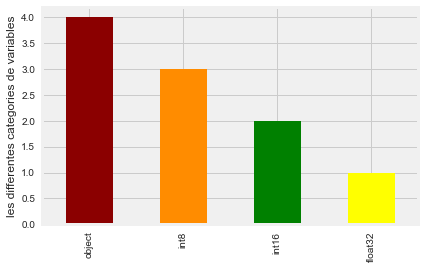

In [75]:
base.dtypes.value_counts().plot.bar( ylabel='les differentes categories de variables',color=['darkred','darkorange','green', 'yellow','blue'])

In [76]:
#Affichons uniquement les doublons
base[base.duplicated()]  

date  date_block_num  shop_id  item_id  item_price  \
76962    05.01.2013               0       54    20130       149.0   
1435367  23.02.2014              13       50     3423       999.0   
1496766  23.03.2014              14       21     3423       999.0   
1671873  01.05.2014              16       50     3423       999.0   
1866340  12.07.2014              18       25     3423       999.0   
2198566  31.12.2014              23       42    21619       499.0   

         item_cnt_day               shop_name  \
76962               1         Химки ТЦ "Мега"   
1435367             1      Тюмень ТЦ "Гудвин"   
1496766             1  Москва МТРЦ "Афи Молл"   
1671873             1      Тюмень ТЦ "Гудвин"   
1866340             1     Москва ТРК "Атриум"   
2198566             1  СПб ТК "Невский Центр"   

                                               item_name  item_category_id  \
76962                            УЧЕНИК ЧАРОДЕЯ (регион)                40   
1435367  Far Cry 3 (Classics) [Xbox 360, русская версия]                23   
1496766  Far Cry 3 (Classics) [Xbox 360, русская версия]                23   
1671873  Far Cry 3 (Classics) [Xbox 360, русская версия]                23   
1866340  Far Cry 3 (Classics) [Xbox 360, русская версия]                23   
2198566                               ЧЕЛОВЕК ДОЖДЯ (BD)                37   

        item_category_name  
76962           Кино - DVD  
1435367    Игры - XBOX 360  
1496766    Игры - XBOX 360  
1671873    Игры - XBOX 360  
1866340    Игры - XBOX 360  
2198566     Кино - Blu-Ray

In [77]:
#Suppression des doublons
base.drop_duplicates(keep = 'first', inplace = True)#inplace=true= est utilisé selon que nous voulons apporter des modifications à la DF d’origine ou non.
base.duplicated().sum() 

0

#### Identification des outliers

In [78]:
def get_box_plot(sales_train):
    cont_cols = list(sales_train._get_numeric_data().columns)
    fig, ax = plt.subplots(nrows=len(cont_cols) // 2 +
                           1, ncols=2, figsize=(10, 10))

    def func(x): return x.replace("_", " ").capitalize()
    cols_corrected = list(map(func, cont_cols))

    var_idx = 0

    for i in range(len(cont_cols) // 2 + 1):
        for j in range(2):
            try:
                sns.boxplot(sales_train[cont_cols[var_idx]],
                            ax=ax[i][j], color="red")
                ax[i][j].set_xlabel(cols_corrected[var_idx])
                var_idx += 1
            except:
                break

    fig.suptitle("Box plots for outliers")

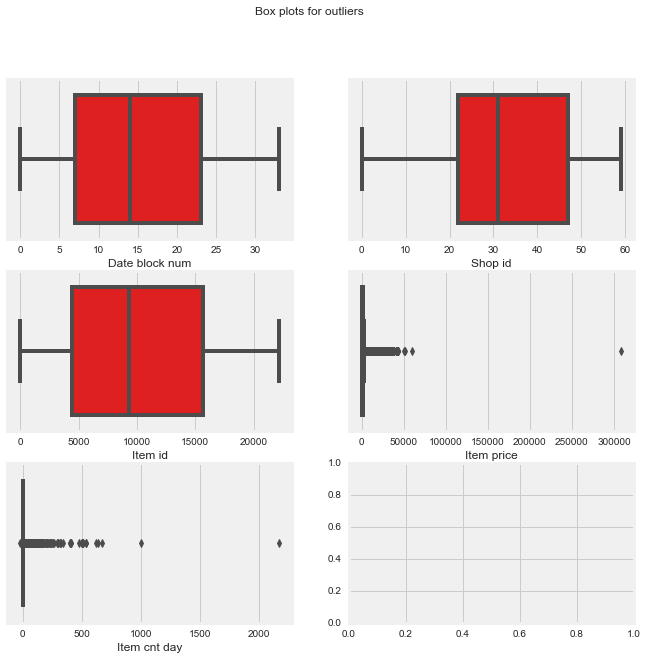

In [79]:
get_box_plot(sales_train)

Nous remarquons que deux variables ont des outliers, soit la variable cible item cnt day et item price.. Essayons donc de voir celà de plus près

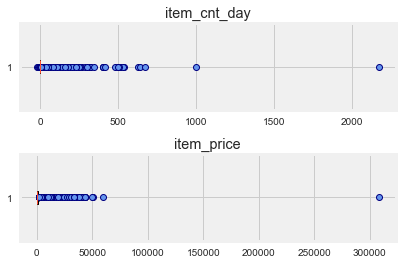

In [81]:
fig, axes = plt.subplots(2, 1)
plt.subplots_adjust(hspace=0.5)

flierprops = dict(marker='o', markerfacecolor='cornflowerblue', markersize=6, markeredgecolor='navy')

_ = axes[0].boxplot(x=base.item_cnt_day, flierprops=flierprops, vert=False)
_ = axes[1].boxplot(x=base.item_price, flierprops=flierprops, vert=False)

_ = axes[0].set_title('item_cnt_day')
_ = axes[1].set_title('item_price')

#### ANALYSE UNIVARIE

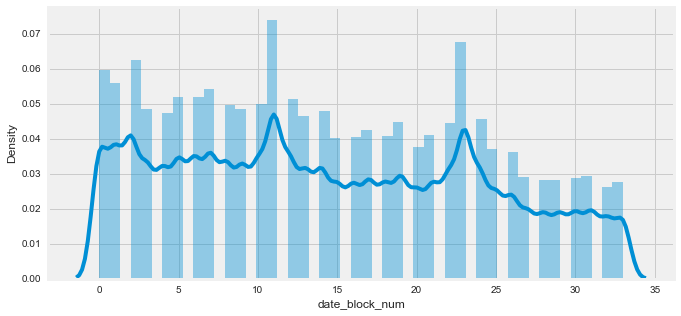

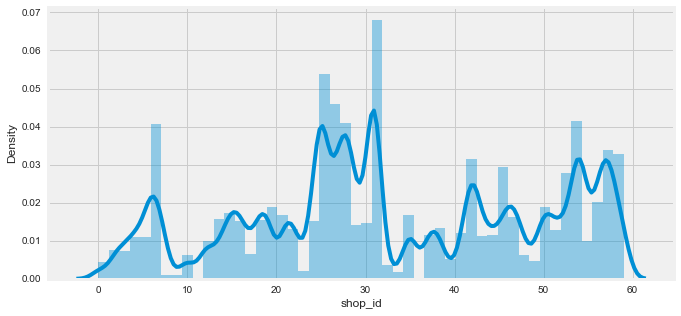

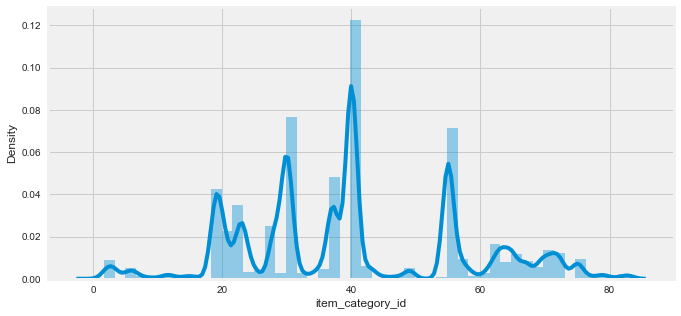

In [82]:
## visualisation des variables de type integer

for col in base.select_dtypes('int8'):
    plt.figure(figsize=(10,5))
    sns.distplot(base[col])

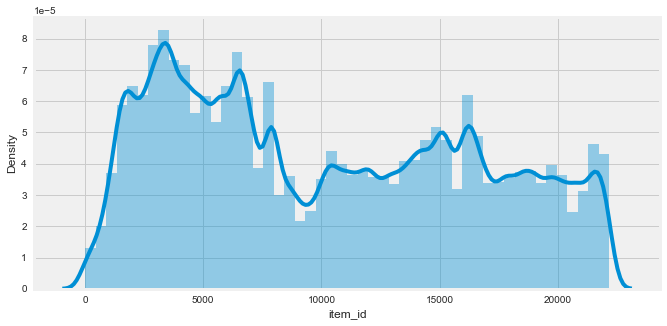

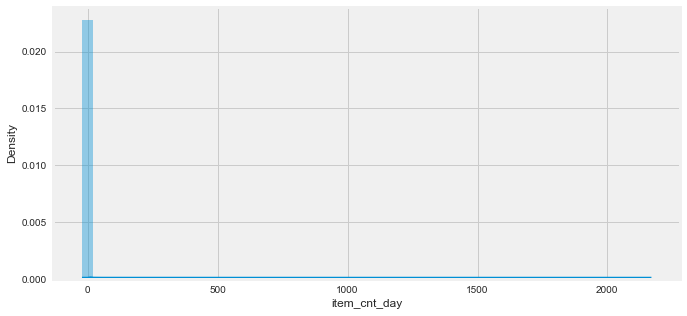

In [83]:
for col in base.select_dtypes('int16'):
    plt.figure(figsize=(10,5))
    sns.distplot(base[col])

#### ANALYSE MULTIVARIEE

<AxesSubplot:>

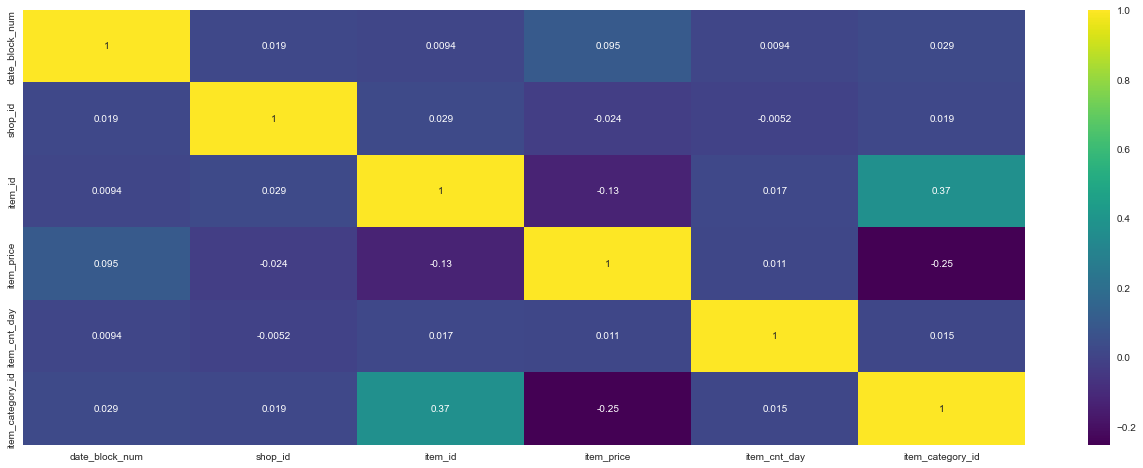

In [96]:
## visualisation des correlations entre les variables quantitatives de la base 

plt.figure(figsize=(20, 8))
sns.heatmap(base.corr(), cmap='viridis', annot=True, )

Nous voyons ainsi les différentes corrélations entre les variables quantitatives...il apparait donc que ces variables n'ont pas vraiment de fortes liaisons. la 4ieme ligne montre les corrélations de notre variable cible avec les autres variables

<Figure size 720x360 with 0 Axes>

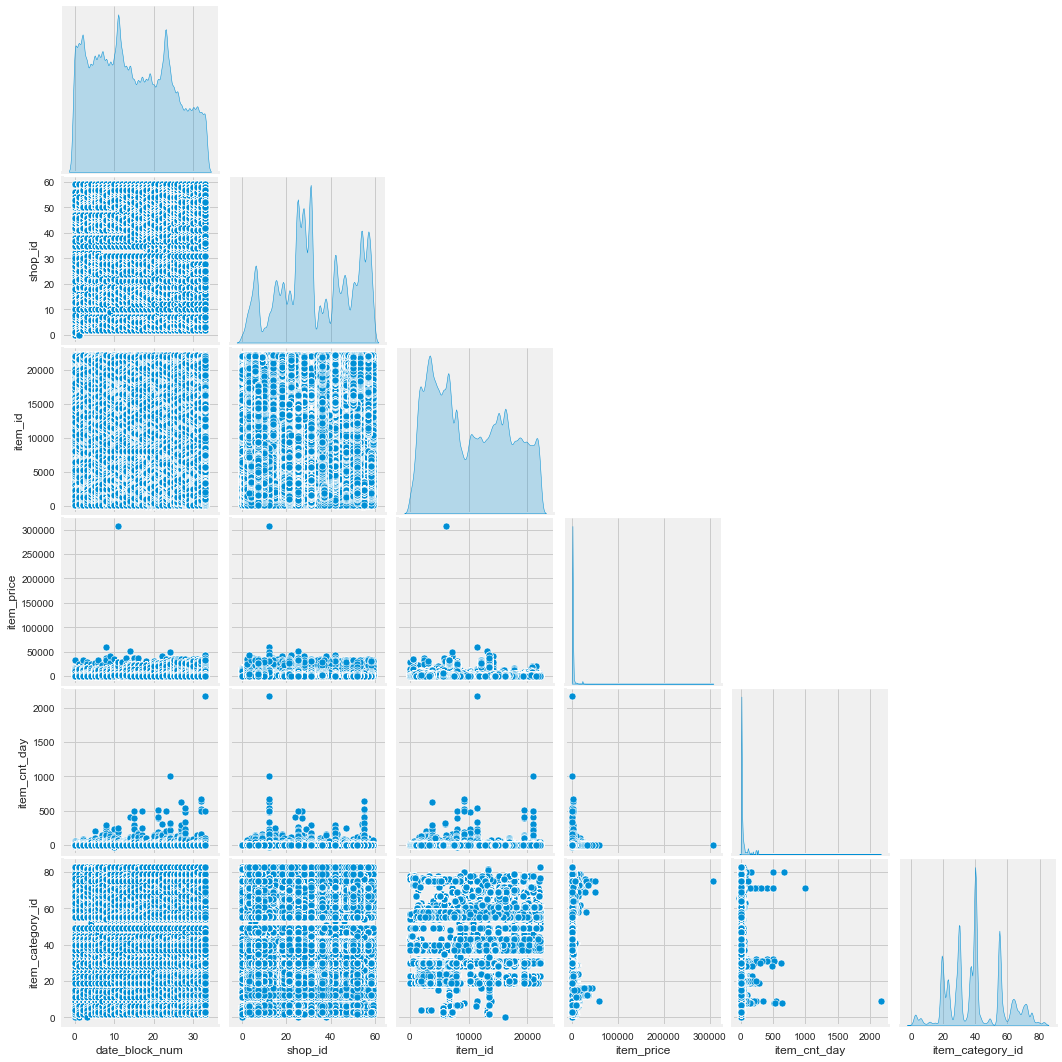

In [85]:
plt.figure(figsize = (10, 5))
sns.pairplot( data= base, corner = True, diag_kind = 'kde')  

In [86]:
sales_train['year'] = pd.DatetimeIndex(sales_train['date']).year
sales_train.year.unique()

array([2013, 2014, 2015], dtype=int64)

In [87]:
sales_train['day'] = pd.DatetimeIndex(sales_train['date']).day

In [89]:
sales_train['month'] = pd.DatetimeIndex(sales_train['date']).month


<AxesSubplot:xlabel='year', ylabel='count'>

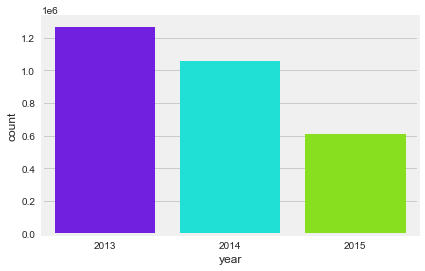

In [90]:
sns.countplot(sales_train['year'], palette='hsv_r') 

Représentation graphique pour les ventes par mois pour chaque année

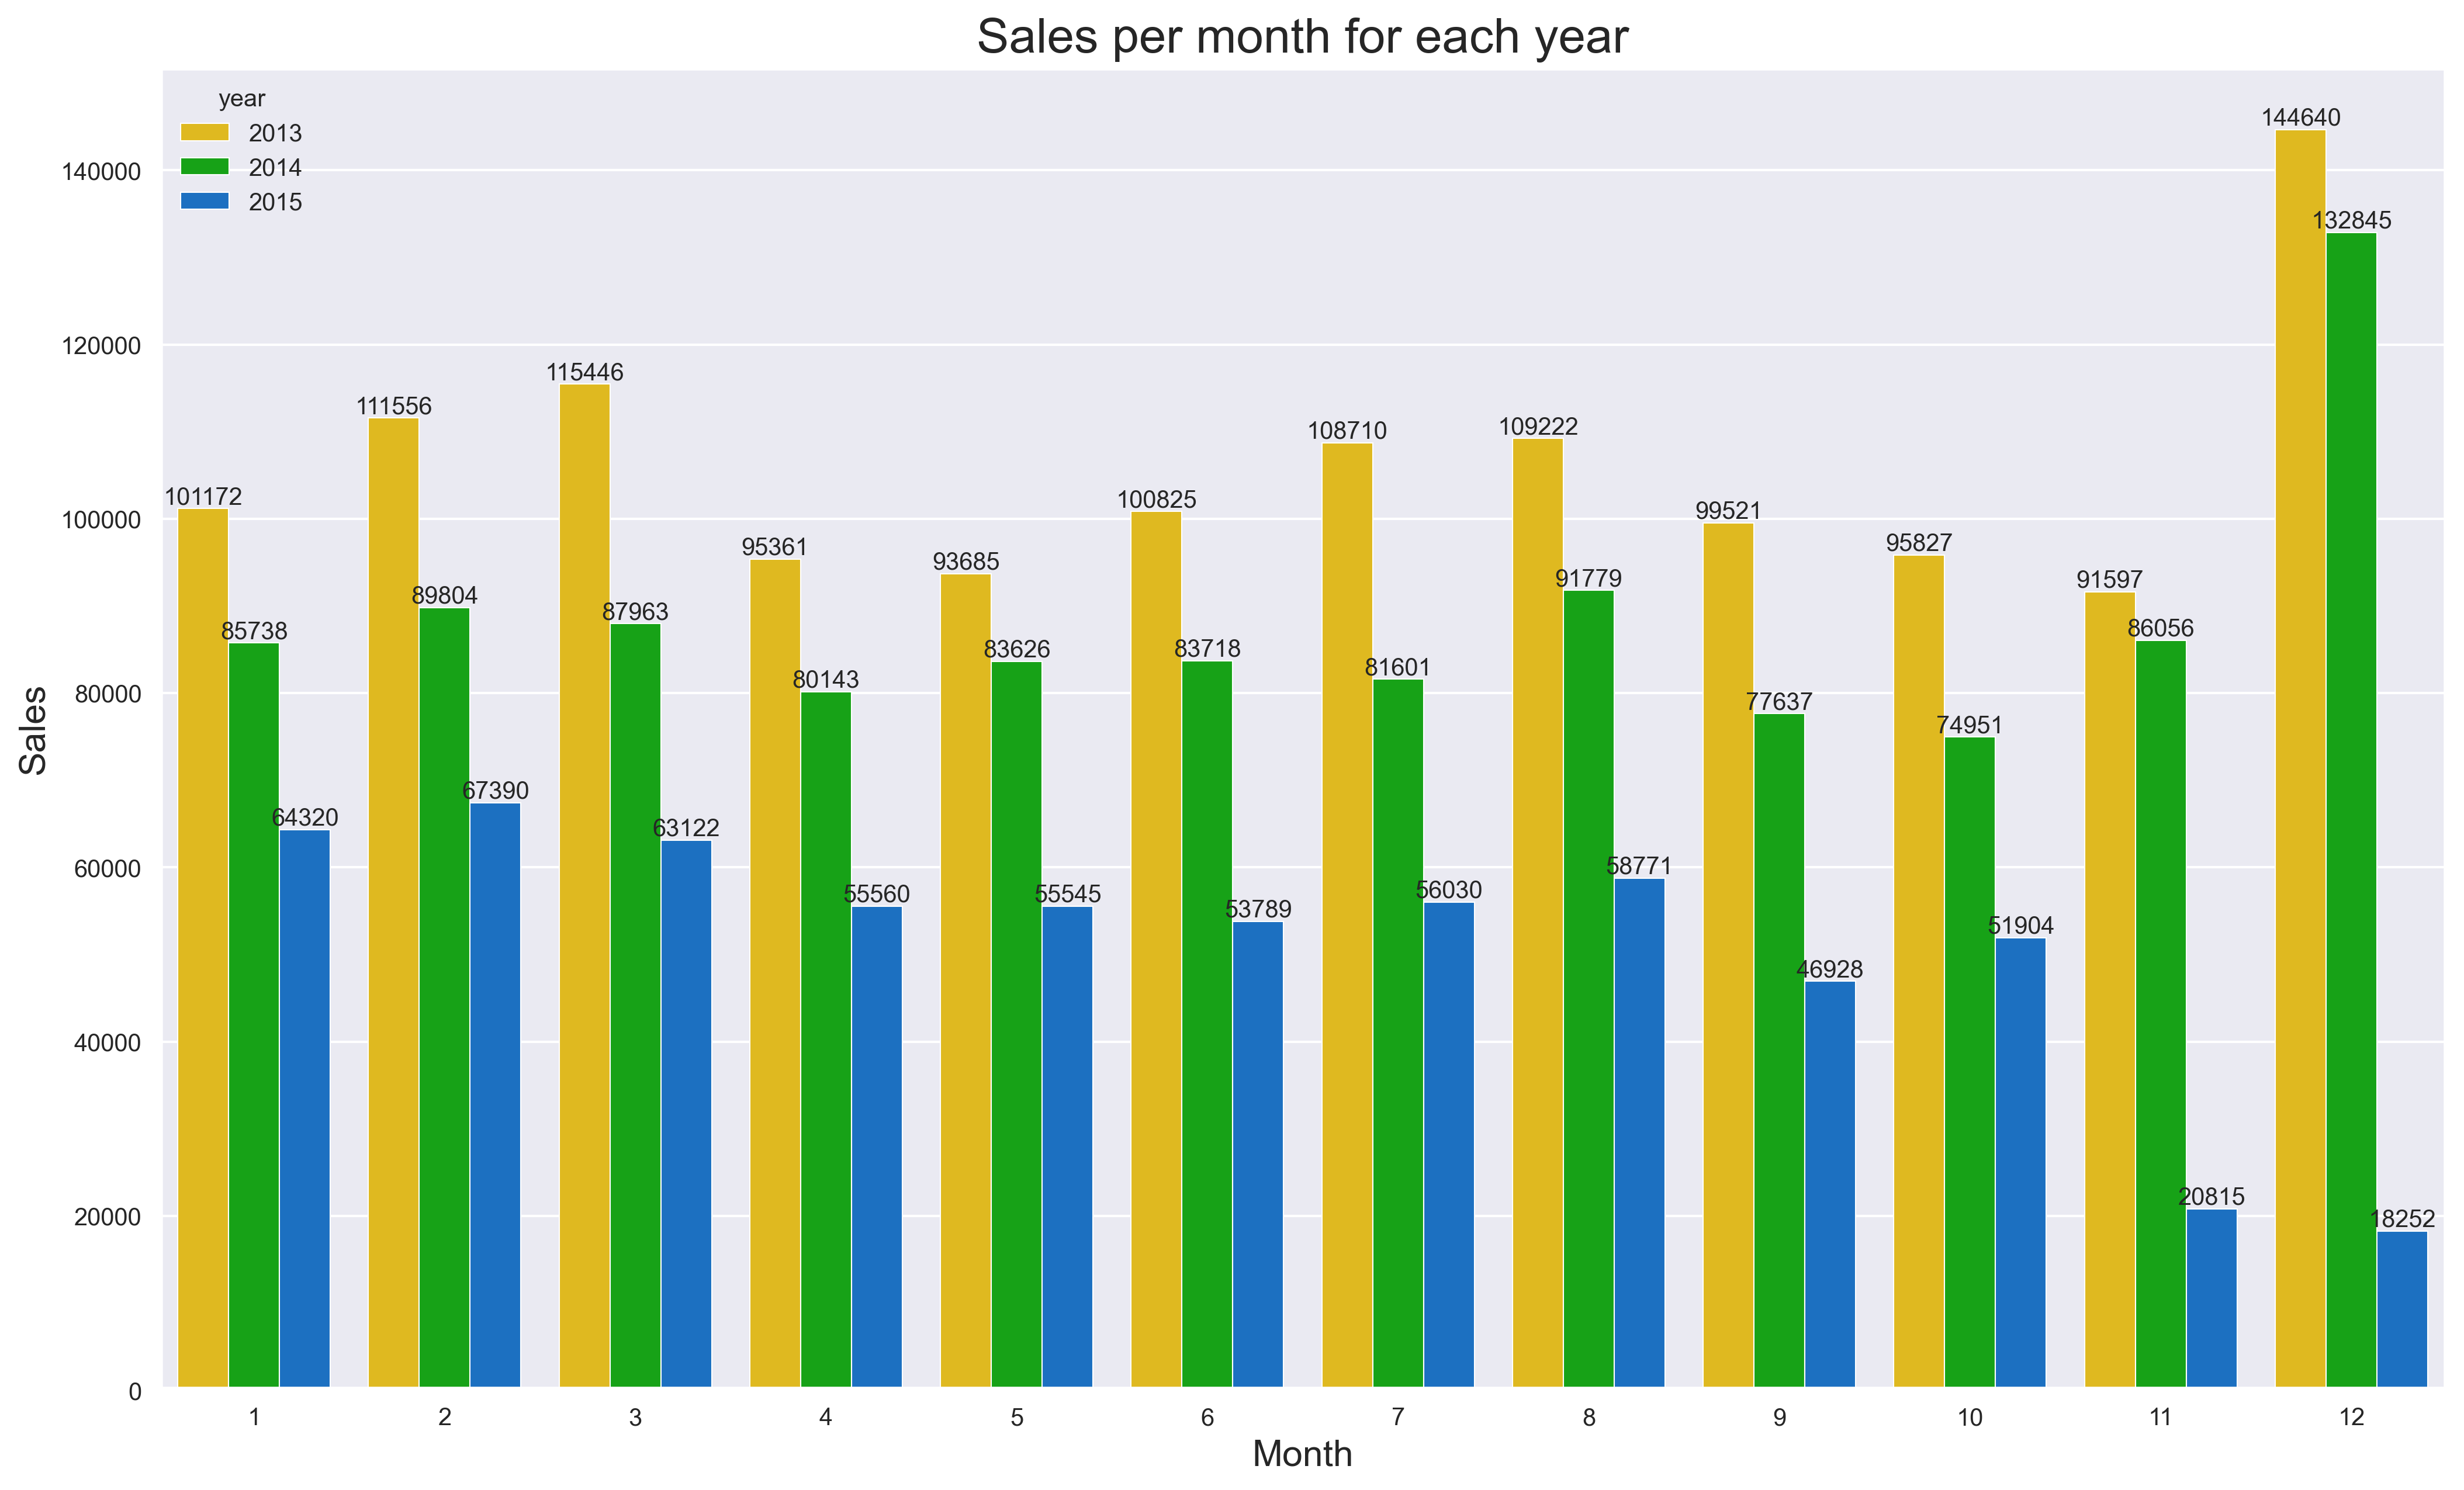

In [91]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,10), dpi=300)
sns.countplot(x='month', hue='year', data=sales_train , palette='nipy_spectral_r')
plt.title('Sales per month for each year', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.bar_label(plt.gca().containers[0], fmt='%.0f')  
plt.bar_label(plt.gca().containers[1], fmt='%.0f')
plt.bar_label(plt.gca().containers[2], fmt='%.0f')

plt.show()

Nous constatons que les ventes explosent dans le mois de Décembre pour les années 2013 et 2014. Bizarrement les ventes de Décembre 2015 sont très faibles.

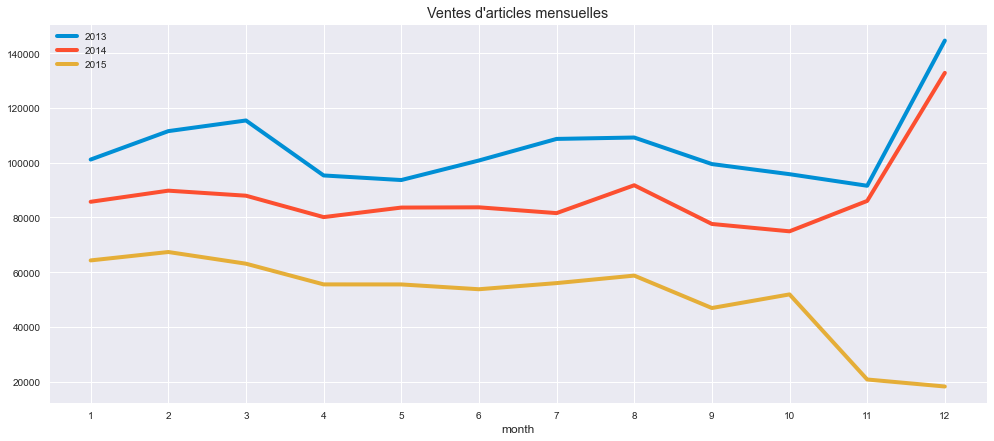

In [92]:
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(1,13)])
sales_train.groupby(sales_train[sales_train['year']==2013].month).count()['item_id'].plot(ax=ax,label=2013)
sales_train.groupby(sales_train[sales_train['year']==2014].month).count()['item_id'].plot(label=2014)
sales_train.groupby(sales_train[sales_train['year']==2015].month).count()['item_id'].plot(label=2015)
plt.grid("on")
plt.title("Ventes d'articles mensuelles")
plt.legend()

Nous constatons que les ventes diminuent chaque année. En effet, le total des ventes pour l'année 2013 est supérieur à celui de 2014 qui est lui aussi supérieur à celui de 2015

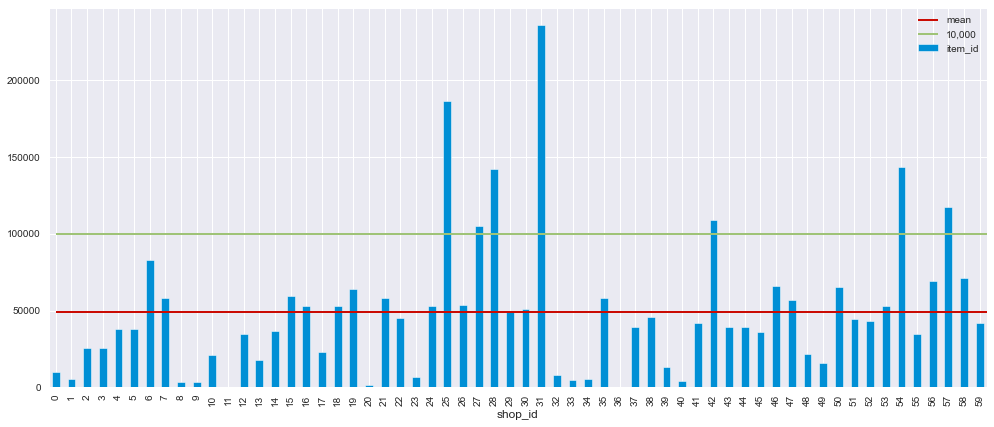

In [93]:
fig, ax = plt.subplots(figsize=(15,7))
sales_train.groupby(sales_train.shop_id).count()['item_id'].plot.bar(ax=ax)
y_avg = sales_train.groupby(sales_train.shop_id).count()['item_id'].mean()
ax.hlines( y_avg, xmin=0, xmax=60, linewidth=2, color='r',label='mean')
ax.hlines( 100000, xmin=0, xmax=60, linewidth=2, color='g',label='10,000')
plt.legend()

La plupart des magasins ont un taux de vente similaire, mais 3 d'entre eux ont un taux beaucoup plus élevé, cela peut être une indication de la taille du magasin.

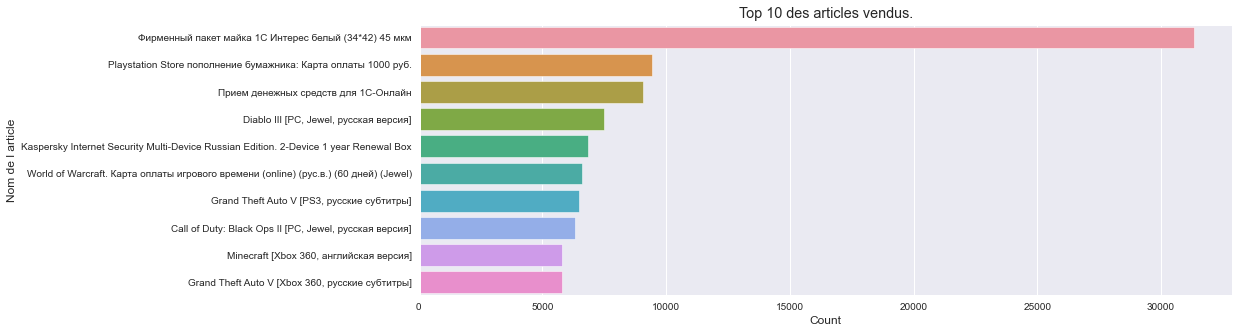

In [94]:
# Find and plot top 10 selling items
top_10_selling_item = base['item_name'].value_counts().head(10)
top_10_selling_item = top_10_selling_item.to_frame().reset_index()
top_10_selling_item.columns = ['item_name', 'count']
plt.figure(figsize=(13, 5))
sns.barplot(data=top_10_selling_item, x='count', y='item_name')
plt.title('Top 10 des articles vendus.')
plt.ylabel('Nom de l article')
plt.xlabel('Count')
plt.show()

### PANDAS PROFILING DE L'EDA

In [95]:
profile = pp.ProfileReport(base, title = "Data Exploration")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Traduisons le Russe

Pour faciliter la manipulation de nos données, nous avons traduit les libellés de nos catégories des produits du russe en englais.

In [3]:
l_cat = list(item_cat.item_category_name)

l_cat[0] = 'PC Headsets'

for ind in range(1,8):
    l_cat[ind] = 'Accessories'
    
l_cat[8] = 'Tickets'  
l_cat[9] = 'Goods'    

for ind in range(10,18):
    l_cat[ind] = 'Game consoles'

for ind in range(18,32):
    l_cat[ind] = 'Games'

for ind in range(32,37):
    l_cat[ind] = 'Payment cards'

for ind in range(37,43):
    l_cat[ind] = 'Movie'

for ind in range(43,55):
    l_cat[ind] = 'Books'

for ind in range(55,61):
    l_cat[ind] = 'Music'

for ind in range(61,73):
    l_cat[ind] = 'Presents'

for ind in range(73,79):
    l_cat[ind] = 'Programs'

l_cat[79] = 'Service'  
l_cat[80] = 'Service'

l_cat[81] = 'Clean media'  
l_cat[82] = 'Clean media'

l_cat[83] = 'Batteries' 

item_cat['cats'] = l_cat

In [4]:
items = pd.merge(items, item_cat, on=['item_category_id'], how='left')

In [5]:
items = items[['item_id', 'cats']]

### Analyse Exploratoire des Données

In [6]:
train.describe()

date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00
max      3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05  2.169000e+03

In [7]:
train.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

In [8]:
test.describe()

ID        shop_id        item_id
count  214200.000000  214200.000000  214200.000000
mean   107099.500000      31.642857   11019.398627
std     61834.358168      17.561933    6252.644590
min         0.000000       2.000000      30.000000
25%     53549.750000      16.000000    5381.500000
50%    107099.500000      34.500000   11203.000000
75%    160649.250000      47.000000   16071.500000
max    214199.000000      59.000000   22167.000000

In [9]:
test.head()

ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268

In [9]:
train['item_id'].unique().shape

(21807,)

In [10]:
test['item_id'].unique().shape

(5100,)

Nous constatons ici que le nombre de produits varie.

In [11]:
set(test.shop_id.unique()).issubset(set(train.shop_id.unique()))# On vérifie que tous les shop du test sont dans train

True

#### Suppression des valleurs abérrantes

In [6]:
train = train[train['item_price'] < 100000]
train = train[train['item_cnt_day'] < 1000]

#### Regroupement des données 

In [7]:
from itertools import product
index_cols = ['shop_id', 'item_id', 'date_block_num']
grid = []
for block_num in train['date_block_num'].unique():
    cur_shops = train.query('date_block_num == @block_num')['shop_id'].unique()
    cur_items = train.query('date_block_num == @block_num')['item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)


#### Mensualisation des données

In [8]:
train = train.groupby(['date_block_num','shop_id','item_id']).agg(
    {'item_cnt_day': 'sum', 'item_price': 'mean'}).reset_index()

In [9]:
train.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)

In [10]:
train_df = pd.merge(grid, train, on=index_cols, how='left')

In [11]:
del grid

#### Mettons les catégories

In [12]:
items = items.filter(items=['item_id', 'cats'])

In [13]:
train = pd.merge(train, items, on=['item_id'], how='left')

In [14]:
test = pd.merge(test, items, on=['item_id'], how='left')

#### Regroupement et Encodage

In [16]:
for type_ids in [['item_id'], ['shop_id'], ['cats']]:
    for column_id in ['item_price', 'item_cnt_month']:
        mean_df = train[type_ids + [column_id]].groupby(type_ids).agg(np.mean).reset_index()
        mean_df.rename(
            {column_id: "mean_of_"+column_id+"_groupby_"+"_".join(type_ids)},
            axis='columns', inplace=True
        )
        
        train = pd.merge(train, mean_df, on=type_ids, how='left')
        test  = pd.merge(test, mean_df, on=type_ids, how='left')

In [17]:
del mean_df

#### Remplissage des valeurs manquantes.

Dans le soucis de completer les données manquantes, nous avons fait une imputation en utilisant la moyenne

In [18]:
test['mean_of_item_cnt_month_groupby_item_id'] = test['mean_of_item_cnt_month_groupby_item_id'].fillna(test['mean_of_item_cnt_month_groupby_cats'])

In [19]:
for df in [train, test]:
    for col in df.columns:
        if 'item_cnt' in col:
            df[col].fillna(0, inplace=True)
        elif 'item_price' in col:
            df[col].fillna(df[col].median(), inplace=True)

In [20]:
train['item_cnt_month'] = train['item_cnt_month'].fillna(0)

#### Ajouter les données des ventes des mois précédents

In [21]:
features = ['item_cnt_month', 'item_price', 'mean_of_item_price_groupby_item_id',
'mean_of_item_cnt_month_groupby_item_id',
'mean_of_item_price_groupby_shop_id',
'mean_of_item_cnt_month_groupby_shop_id',
'mean_of_item_price_groupby_cats',
'mean_of_item_cnt_month_groupby_cats',
]

In [22]:
def add_data(df):
    for diff in (1,6,12):
        train_copy = train_temp.copy()
        train_copy['date_block_num'] += diff
        train_copy = train_copy[['date_block_num', 'item_id', 'shop_id'] + features]
        train_copy = train_copy.rename(columns={feat: feat+"_"+str(diff)+'_month_ago' for feat in features})
        df = pd.merge(df, train_copy, on=['shop_id', 'item_id', 'date_block_num'], how='left')
    return df

In [26]:
for df in [train, test]:
    for feat in df.columns[6:]:
        if 'item_cnt' in feat:
            df[feat]=df[feat].fillna(0)
        elif 'item_price' in feat:
            df[feat]=df[feat].fillna(df[feat].median())

In [104]:
train_df.head(10)

date_block_num  shop_id  item_cnt_month  item_price  \
0               0        0             6.0       221.0   
1               0        0             3.0       347.0   
2               0        0             1.0       247.0   
3               0        0             1.0       221.0   
4               0        0             2.0       128.5   
5               0        0             1.0       195.0   
6               0        0             1.0        76.0   
7               0        0             1.0        76.0   
8               0        0             1.0       193.0   
9               0        0             1.0        70.0   

   mean_of_item_price_groupby_item_id  mean_of_item_cnt_month_groupby_item_id  \
0                          221.330209                                2.664968   
1                          245.228381                                1.487544   
2                          377.840667                                2.960000   
3                          167.222222                                1.000000   
4                          265.410714                                1.404762   
5                          319.916667                                1.000000   
6                          141.519149                                1.085106   
7                          139.818605                                1.000000   
8                          259.000000                                1.000000   
9                          144.690909                                1.145455   

   mean_of_item_price_groupby_shop_id  mean_of_item_cnt_month_groupby_shop_id  \
0                          461.619006                                 2.42792   
1                          461.619006                                 2.42792   
2                          461.619006                                 2.42792   
3                          461.619006                                 2.42792   
4                          461.619006                                 2.42792   
5                          461.619006                                 2.42792   
6                          461.619006                                 2.42792   
7                          461.619006                                 2.42792   
8                          461.619006                                 2.42792   
9                          461.619006                                 2.42792   

   mean_of_item_price_groupby_cats  mean_of_item_cnt_month_groupby_cats  
0                       340.509868                             1.745858  
1                       340.509868                             1.745858  
2                       340.509868                             1.745858  
3                       340.509868                             1.745858  
4                       372.622621                             1.379644  
5                       350.784042                             1.680894  
6                       340.509868                             1.745858  
7                       340.509868                             1.745858  
8                       340.509868                             1.745858  
9                       340.509868                             1.745858

In [27]:
train_df = train.drop(columns=["cats","item_id"], axis = 1)

### Split des données

Ici nous splitons nos données en train et test. Nous avons pris 80% pour le train et 20% pour le test.

In [28]:
final_train_df = train_df[train_df.date_block_num<=27]
final_test_df = train_df[train_df.date_block_num>27]

y_train = train_df[["item_cnt_month"]]
x_train = train_df.drop("item_cnt_month", axis = 1)
 
y_test = final_test_df[["item_cnt_month"]] 
x_test = final_test_df.drop("item_cnt_month", axis = 1)

## Definition des métriques

In [30]:
def get_performances(real_value, estimated_value, metrics):
    perfs = []
    for metric_func in metrics:
        perfs.append((metric_func.__name__, metric_func(real_value, estimated_value)))
    return pd.DataFrame(perfs, columns=["metric", "value"])


def get_all_performances(value_train, values_test, metrics):
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*value_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,} 

In [31]:
METRICS = [r2_score,
           mean_squared_error,
           mean_absolute_error,
           max_error
          ] 

In [32]:
def rmse(x,y):
    rmse= np.sqrt(mean_squared_error(x,y))
    return rmse


### Regression lineaire

In [45]:
def define_pipeline(estimator,
                    parameters,
                    numeric_transformer,
                    categorical_transformer
                   ):
    """ Construct a Pipeline from the given transfomers & estimators
    """
    if not parameters:
        parameters = dict()
    numeric_transformer = make_pipeline(*numeric_transformer)
    categorical_transformer = make_pipeline(*categorical_transformer)


    preprocessor = ColumnTransformer(
        transformers=[
            ("num", make_pipeline(*numeric_transformer), make_column_selector(dtype_include="number")),
            ("cat", make_pipeline(*categorical_transformer), make_column_selector(dtype_include=["object"])),
        ]
    )

  
    return Pipeline(steps=[("preprocessor", preprocessor), ("regressor", estimator(**parameters))])

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [37]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                        StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
reg_lin = define_pipeline(estimator=LinearRegression,
                             parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
reg_lin 

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=None,
                                                                                 min_frequency=None,
                                                                                 sparse='deprecated',
                                                                                 sparse_output=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001DC86157310>)],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  positive=False))],
         verbose=False)

In [38]:
reg_lin.fit(x_train, y_train)
print(f"Model score - training data: {reg_lin.score(x_train, y_train)}")
print(f"Model score - test data: {reg_lin.score(x_test, y_test)}") 

Model score - training data: 0.3310503821398114
Model score - test data: 0.21564019929847456


In [39]:
y_test_pred = reg_lin.predict(x_test)
y_train_pred = reg_lin.predict(x_train)  

In [40]:
rmse_lin=rmse(y_test, y_test_pred)
rmse_lin 

8.565533177579077

In [41]:
get_performances(real_value= y_test, estimated_value= y_test_pred, metrics=METRICS) 

metric        value
0             r2_score     0.215640
1   mean_squared_error    73.368359
2  mean_absolute_error     1.569490
3            max_error  1399.157575

### Lasso

In [45]:
from sklearn.linear_model import Lasso

Modele_lasso = Lasso(fit_intercept = True, alpha = 5)
Modele_lasso.fit(x_train, y_train)
train_score = Modele_lasso.score(x_train, y_train)
test_score = Modele_lasso.score(x_test, y_test)

train_score, test_score

(0.3098018214649758, 0.2417013508912096)

In [46]:
y_test_pred_lasso =Modele_lasso.predict(x_test)
y_train_pred_lasso = Modele_lasso.predict(x_train) 

In [47]:
get_performances(real_value= y_test, estimated_value= y_test_pred_lasso, metrics=METRICS)

metric        value
0             r2_score     0.241701
1   mean_squared_error    70.930620
2  mean_absolute_error     1.541677
3            max_error  1453.217116

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(x_ax,y_test, color="blue", label="original")
plt.plot(x_ax, y_test_pred_lasso, color = 'orange', label="predicted")
plt.title("comparaison total ventes du test et prédictions")
plt.legend()
plt.show() 

### GBM

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

Modele_SGB = GradientBoostingRegressor()
Modele_SGB.fit(x_train, y_train)
train_score = Modele_SGB.score(x_train, y_train)
test_score = Modele_SGB.score(x_test, y_test)

train_score, test_score

(0.6539992313273625, 0.6788004258347275)

In [50]:
y_test_pred_SGB = Modele_SGB.predict(x_test)
y_train_pred_SGB = Modele_SGB.predict(x_train)   

In [51]:
get_performances(real_value= y_test, estimated_value= y_test_pred_SGB, metrics=METRICS)  

metric       value
0             r2_score    0.678800
1   mean_squared_error   30.044739
2  mean_absolute_error    1.222735
3            max_error  588.346970

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(x_ax,y_test, color="green", label="original")
plt.plot(x_ax, y_test_pred_SGB, color = 'yellow', label="predicted")
plt.title("comparaison total ventes du test et prédictions")
plt.legend()
plt.show() 

## Regression ridge

In [53]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                        StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
ridge = define_pipeline(estimator=RidgeCV,
                            parameters=None,
                            numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                           )
ridge 

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                                                                                 sparse='deprecated',
                                                                                 sparse_output=True))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001DCB33EAC10>)],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('regressor',
                 RidgeCV(alpha_per_target=False, alphas=(0.1, 1.0, 10.0),
                         cv=None, fit_intercept=True, gcv_mode=None,
                         scoring=None, store_cv_values=False))],
         verbose=False)

In [54]:
ridge.fit(x_train, y_train)
print(f"Model score - training data: {ridge.score(x_train, y_train)}")
print(f"Model score - test data: {ridge.score(x_test, y_test)}")  


Model score - training data: 0.33105038212478954
Model score - test data: 0.21564196025751559


In [55]:
rmse_rig= rmse(y_test,ridge.predict(x_test))
rmse_rig 

8.56552356237344

In [56]:
y_test_pred_ridge = ridge.predict(x_test)
y_train_pred_ridge = ridge.predict(x_train)

In [57]:
get_performances(real_value= y_test, estimated_value= y_test_pred_ridge, metrics=METRICS)

metric        value
0             r2_score     0.215642
1   mean_squared_error    73.368194
2  mean_absolute_error     1.569483
3            max_error  1399.159124

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(x_ax,y_test, color="green", label="original")
plt.plot(x_ax, y_test_pred_ridge, color = 'yellow', label="predicted")
plt.title("comparaison total ventes du test et prédictions")
plt.legend()
plt.show() 

In [59]:
from xgboost import XGBRegressor

In [60]:
# Creating the Model
xgb_model = XGBRegressor(
    n_estimators=500
    , learning_rate=0.05
    , n_jobs=4
)

In [61]:
xgb_model.fit(
    x_train, y_train
    , early_stopping_rounds=5
    , eval_set=[(x_test, y_test)]
    , verbose=False
)
print('Training: Done!')

xgb_predictions = xgb_model.predict(x_test)
print('Predictions: Done!') 

Training: Done!
Predictions: Done!


In [62]:
train_score =xgb_model.score(x_train, y_train)
test_score = xgb_model.score(x_test, y_test)

train_score, test_score 

(0.8551683567771041, 0.9157249347111093)

In [63]:
y_test_pred_xgb = xgb_model.predict(x_test)
y_train_pred_xgb = xgb_model.predict(x_train) 

In [64]:
get_performances(real_value= y_test, estimated_value= y_test_pred_xgb , metrics=METRICS)   

metric       value
0             r2_score    0.915725
1   mean_squared_error    7.883019
2  mean_absolute_error    0.944065
3            max_error  385.642014

## RANDOM FOREST

In [47]:
NUMERIC_TRANSFORMER = [SimpleImputer(strategy="median"),
                        StandardScaler()]
CATEGORY_TRANSFORMER = [SimpleImputer(strategy="constant", fill_value="missing"),
                        OneHotEncoder(handle_unknown="ignore")]
random = define_pipeline(estimator=RandomForestRegressor,
                              parameters=None,
                               numeric_transformer=NUMERIC_TRANSFORMER,
                            categorical_transformer=CATEGORY_TRANSFORMER
                          )
random 

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 keep_empty_features=False,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose='deprecated')),
                                                                  (...
                ('regressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='squared_error',
                                       max_depth=None, max_features=1.0,
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [48]:
random.fit(x_train, y_train)
print(f"Model score - training data: {random.score(x_train, y_train)}")
print(f"Model score - test data: {random.score(x_test, y_test)}")  

Model score - training data: 0.9656870502072843
Model score - test data: 0.9636952940875341


Les scores affichés pour le modèle radomforest sont respectivement pour les données et celles de est de 96,56% et 96,36%. Nous pouvons affirmer que ce modele ne sur-apprend pas et ne sous apprend pas parce que les scores pour le train et le test sont quasiment identiques. En tenant compte non seulement de cette raison mais aussi du fait que ce sont les scores les plus grands comparés aux autres modèles exécutés précedemment, nous continuonerons le reste du travail avec ce modèle.

In [62]:
rmse_rf= rmse(y_test,random.predict(x_test))
rmse_rf 

1.8427999822955785

Nous constatons que le RMSE est relativement faible

A présent, nous nous intéresserons à l'importances des variables 

### Features Importances

In [49]:
random[1].feature_importances_

array([0.17143663, 0.0243699 , 0.1466205 , 0.05368015, 0.37910569,
       0.04966426, 0.15486803, 0.00660438, 0.01365047])

<AxesSubplot:>

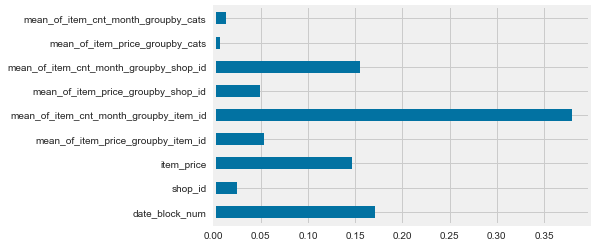

In [61]:
feature_importance = pd.Series(random[1].feature_importances_, index=x_train.columns)
indices = np.argsort(feature_importance)
feature_importance.plot.barh(range(len(indices)), importances[indices], color='b', align='center')

La figure ci-dessus présente les pouvoirs explicatifs de chaque variables utilisées dans le modèle pour expliquer notre variabre cible

### Optimisation des Hyperparamètres du modèle Randomforest

Nous utilisons ici la technique d'optimisation des hyperparamètres pour améliorer les performances de notre modèle en ajustant les paramètres qui ne sont pas appris lors de l'entraînement. Ces paramètres sont appelés hyperparamètres.

#### Définition des Hyperparamètres à utiliser

Nous définissons ici une grille de paramètres, plus précisément pour un classificateur de forêt aléatoire. L'algorithme de recherche de grille entraînera et évaluera un modèle pour chaque combinaison de ces valeurs d'hyperparamètres, ce qui vous permettra de trouver le meilleur ensemble d'hyperparamètres pour le modèle.

In [37]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 8],
    'min_samples_leaf': [2, 4, 8]
}

Le code ci-dessus définit un dictionnaire des paramètres à optimiser. Il s'agit du nombre d'abres à estimer, la profondeur maximale des arbres et le nombre minimum d'échantillons nécessaires 

In [ ]:
# utilisation de GridSearchCV pour optimiser les hyperparamètres
grid_search = GridSearchCV(estimator = random, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)

#### Initialisation du modèle

In [38]:
rf = RandomForestClassifier(n_estimators=50, max_depth=2, min_samples_leaf=2)

#### Entrainement du modèle sur les données d'entrainement

In [39]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [99]:
# Instancier la grille de recherche d'hyperparamètres
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [100]:
# Entraîner le modèle en utilisant la grille de recherche
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=2,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             n_jobs=None,
             param_grid={'max_depth': [2, 4, 8], 'min_samples_leaf': [2, 4, 8],
                         'n_estimators': [50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### Affichage des meilleurs Hyperparamètres

In [40]:
print('Meilleurs hyperparamètres:', grid_search.best_params_)

Meilleurs hyperparamètres: {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 50}


 Il resulte de ce processus que les meilleurs paramètres sont 'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 50. Il les incorporons dans le modèle puis réeestimons le modèle pour voir si il va s'améliorer.

### Prédiction

Nous allons à présent proceder à la prédiction de nombre de ventes par produits pour le mois prochain, c'est-à-dire le mois de novembre 2015. Nous constatons effectivement que le nombre de ventes prédits est dans le même ordre de grandeur que les données que nous avons pour les mois passés, cet état de fait nous conforte quant au choix du modèle que nous avons opéré.

In [63]:
item_ids = train["item_id"].unique()
items_price_mapping = {item_id: train[train.item_id==item_id].iloc[0]["item_price"] for item_id in item_ids}
test["item_price"] = test["item_id"].apply(lambda item_id: items_price_mapping.get(item_id,0))

In [56]:
test["date_block_num"]=34
test["Prédiction"]=random.predict(test)

In [66]:
Prediction=test[["item_id","Prédiction"]]

In [67]:
Prediction.head(50)

item_id  Prédiction
0      5037        1.66
1      5320        1.56
2      5233        1.07
3      5232        1.49
4      5268        1.70
5      5039        1.47
6      5041        2.47
7      5046        1.22
8      5319        2.57
9      5003        2.73
10     4806        3.20
11     4843        1.53
12     4607        1.02
13     4869        1.78
14     4870        3.46
15     4872        2.74
16     4874        1.03
17     4678        1.18
18     4892        2.96
19     4964        1.34
20     4717        1.27
21     5002        1.07
22     5823        2.54
23     5814        1.03
24     5900        1.29
25     5907        1.07
26     5908        1.04
27     5643        1.66
28     5657        1.62
29     5675        5.91
30     5666        0.60
31     5668        1.11
32     5669        1.30
33     5672        1.58
34     5653        1.15
35     5678        0.92
36     5674        0.76
37     5671        2.11
38     5845        1.00
39     5841        1.04
40     5840        1.23
41     5820        2.64
42     5821        3.70
43     5822        2.97
44     5824        3.09
45     5826        1.67
46     5827        3.24
47     5828        1.79
48     5829        1.66
49     5837        2.38